In [ ]:
library(dplyr)
library(gRbase)
library(RGraphics) 
library(gRain)
library(bnlearn)
library(igraph)
library(tidyr)
library(graph)
library(bnstruct)
library(deal)
library(pcalg)
library(bnviewer)

In [15]:
data=read.csv("D:/heart.csv")

In [4]:
data

function (..., list = character(), package = NULL, lib.loc = NULL, 
    verbose = getOption("verbose"), envir = .GlobalEnv, overwrite = TRUE) 
{
    fileExt <- function(x) {
        db <- grepl("\\.[^.]+\\.(gz|bz2|xz)$", x)
        ans <- sub(".*\\.", "", x)
        ans[db] <- sub(".*\\.([^.]+\\.)(gz|bz2|xz)$", "\\1\\2", 
            x[db])
        ans
    }
    my_read_table <- function(...) {
        lcc <- Sys.getlocale("LC_COLLATE")
        on.exit(Sys.setlocale("LC_COLLATE", lcc))
        Sys.setlocale("LC_COLLATE", "C")
        read.table(...)
    }
    stopifnot(is.character(list))
    names <- c(as.character(substitute(list(...))[-1L]), list)
    if (!is.null(package)) {
        if (!is.character(package)) 
            stop("'package' must be a character vector or NULL")
    }
    paths <- find.package(package, lib.loc, verbose = verbose)
    if (is.null(lib.loc)) 
        paths <- c(path.package(package, TRUE), if (!length(package)) getwd(), 
            paths)
    paths <- unique(normalizePath(paths[file.exists(paths)]))
    paths <- paths[dir.exists(file.path(paths, "data"))]
    dataExts <- tools:::.make_file_exts("data")
    if (length(names) == 0L) {
        db <- matrix(character(), nrow = 0L, ncol = 4L)
        for (path in paths) {
            entries <- NULL
            packageName <- if (file_test("-f", file.path(path, 
                "DESCRIPTION"))) 
                basename(path)
            else "."
            if (file_test("-f", INDEX <- file.path(path, "Meta", 
                "data.rds"))) {
                entries <- readRDS(INDEX)
            }
            else {
                dataDir <- file.path(path, "data")
                entries <- tools::list_files_with_type(dataDir, 
                  "data")
                if (length(entries)) {
                  entries <- unique(tools::file_path_sans_ext(basename(entries)))
                  entries <- cbind(entries, "")
                }
            }
            if (NROW(entries)) {
                if (is.matrix(entries) && ncol(entries) == 2L) 
                  db <- rbind(db, cbind(packageName, dirname(path), 
                    entries))
                else warning(gettextf("data index for package %s is invalid and will be ignored", 
                  sQuote(packageName)), domain = NA, call. = FALSE)
            }
        }
        colnames(db) <- c("Package", "LibPath", "Item", "Title")
        footer <- if (missing(package)) 
            paste0("Use ", sQuote(paste("data(package =", ".packages(all.available = TRUE))")), 
                "\n", "to list the data sets in all *available* packages.")
        else NULL
        y <- list(title = "Data sets", header = NULL, results = db, 
            footer = footer)
        class(y) <- "packageIQR"
        return(y)
    }
    paths <- file.path(paths, "data")
    for (name in names) {
        found <- FALSE
        for (p in paths) {
            tmp_env <- if (overwrite) 
                envir
            else new.env()
            if (file_test("-f", file.path(p, "Rdata.rds"))) {
                rds <- readRDS(file.path(p, "Rdata.rds"))
                if (name %in% names(rds)) {
                  found <- TRUE
                  if (verbose) 
                    message(sprintf("name=%s:\t found in Rdata.rds", 
                      name), domain = NA)
                  thispkg <- sub(".*/([^/]*)/data$", "\\1", p)
                  thispkg <- sub("_.*$", "", thispkg)
                  thispkg <- paste0("package:", thispkg)
                  objs <- rds[[name]]
                  lazyLoad(file.path(p, "Rdata"), envir = tmp_env, 
                    filter = function(x) x %in% objs)
                  break
                }
                else if (verbose) 
                  message(sprintf("name=%s:\t NOT found in names() of Rdata.rds, i.e.,\n\t%s\n", 
                    name, paste(names(rds), collapse = ",")), 
                    domain = NA)
            }
            files <- list.files(p, fu

In [7]:
sum(is.na(data))

Warning message in is.na(data):
"is.na() applied to non-(list or vector) of type 'closure'"


[1] 0

In [8]:
info(data)

ERROR: Error in info(data): could not find function "info"


In [9]:
str(data)

function (..., list = character(), package = NULL, lib.loc = NULL, verbose = getOption("verbose"), 
    envir = .GlobalEnv, overwrite = TRUE)  


In [10]:
summary(data)

ERROR: Error in object[[i]]: object of type 'closure' is not subsettable


In [11]:
dim(data)

NULL

In [12]:
plot(density(data$trestbps))

ERROR: Error in (function (cond) : error in evaluating the argument 'x' in selecting a method for function 'plot': object of type 'closure' is not subsettable


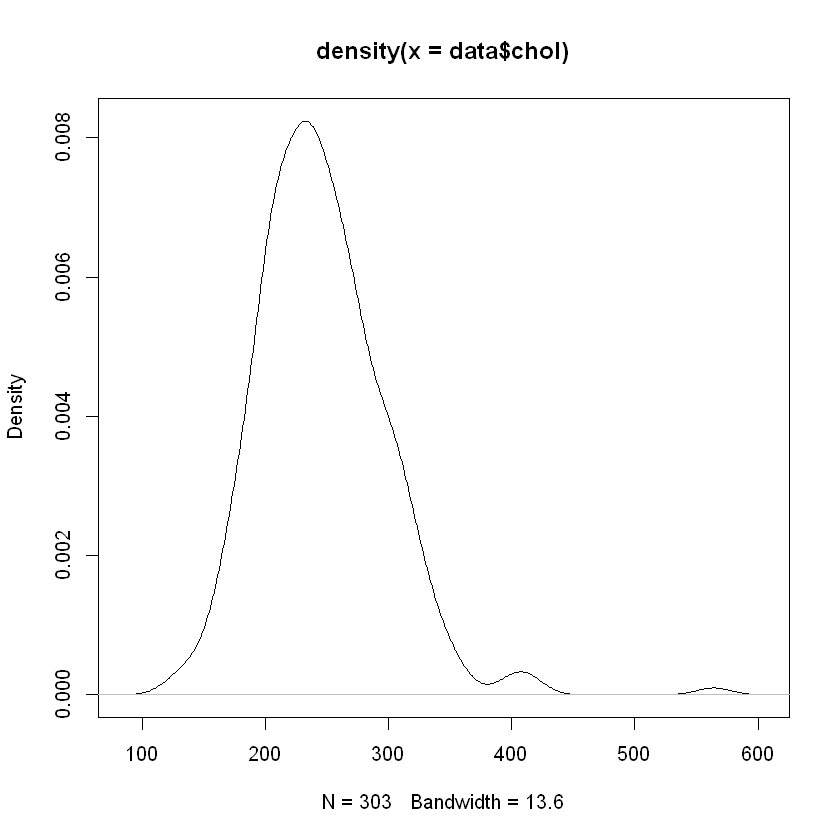

In [10]:
plot(density(data$chol))

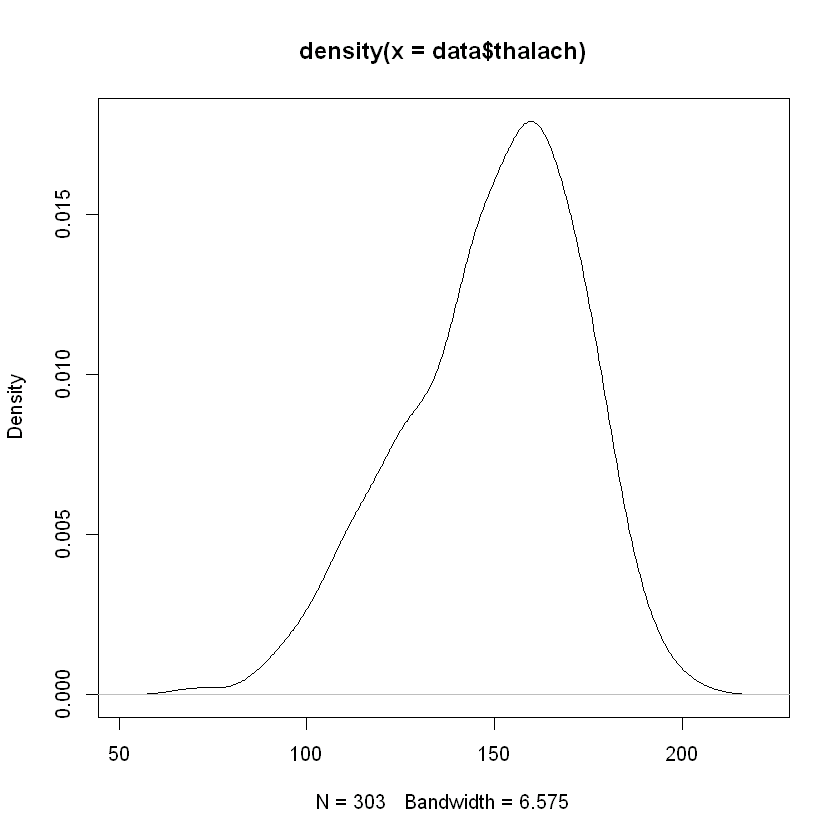

In [11]:
plot(density(data$thalach))

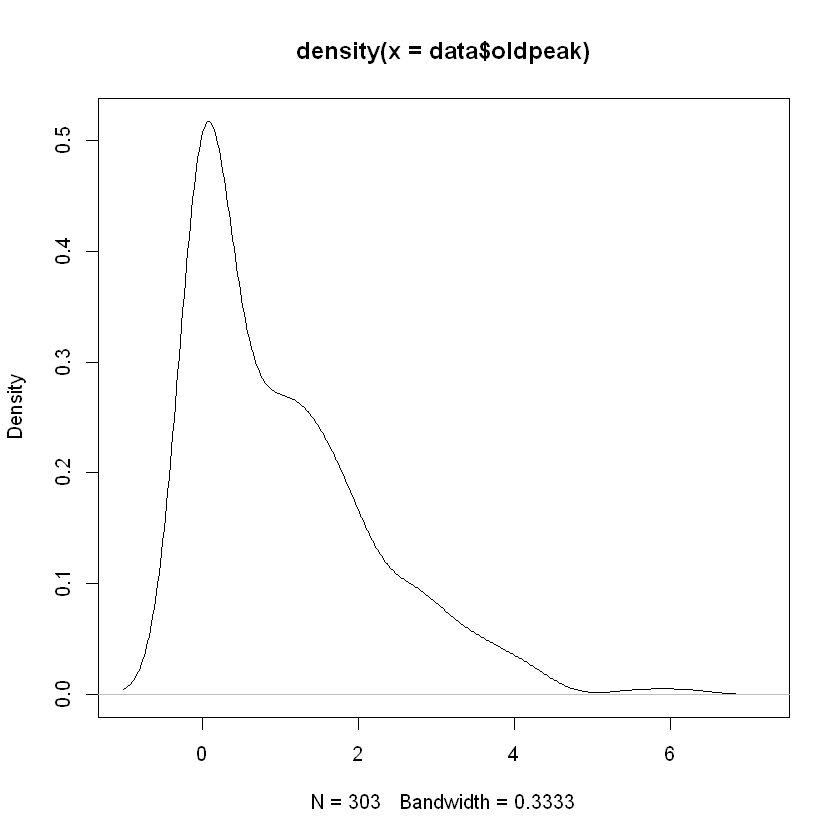

In [12]:
plot(density(data$oldpeak))

In [16]:
data$cp <- as.factor(data$cp)

In [18]:
regressione_logestic=glm(data$target~.,data=data,family  = "binomial")

In [19]:
regressione_logestic


Call:  glm(formula = data$target ~ ., family = "binomial", data = data)

Coefficients:
(Intercept)          age          sex          cp1          cp2          cp3  
   3.250789    -0.004039    -1.734184     1.192034     2.037023     2.161581  
   trestbps         chol          fbs      restecg      thalach        exang  
  -0.018199    -0.004870    -0.006010     0.442949     0.022482    -0.906075  
    oldpeak        slope           ca         thal  
  -0.508380     0.576876    -0.789302    -0.892066  

Degrees of Freedom: 302 Total (i.e. Null);  287 Residual
Null Deviance:	    417.6 
Residual Deviance: 209.7 	AIC: 241.7

In [20]:
summary(regressione_logestic)


Call:
glm(formula = data$target ~ ., family = "binomial", data = data)

Coefficients:
             Estimate Std. Error z value Pr(>|z|)    
(Intercept)  3.250789   2.575396   1.262 0.206860    
age         -0.004039   0.023323  -0.173 0.862503    
sex         -1.734184   0.472071  -3.674 0.000239 ***
cp1          1.192034   0.543972   2.191 0.028426 *  
cp2          2.037023   0.465348   4.377  1.2e-05 ***
cp3          2.161581   0.632742   3.416 0.000635 ***
trestbps    -0.018199   0.010333  -1.761 0.078195 .  
chol        -0.004870   0.003832  -1.271 0.203790    
fbs         -0.006010   0.539607  -0.011 0.991114    
restecg      0.442949   0.350787   1.263 0.206686    
thalach      0.022482   0.010490   2.143 0.032094 *  
exang       -0.906075   0.416160  -2.177 0.029463 *  
oldpeak     -0.508380   0.218811  -2.323 0.020159 *  
slope        0.576876   0.354136   1.629 0.103321    
ca          -0.789302   0.194404  -4.060  4.9e-05 ***
thal        -0.892066   0.291525  -3.060 0.002213

In [23]:
OR <- exp(coef(regressione_logestic))

In [25]:
sort(OR)

sex       exang        thal          ca     oldpeak    trestbps 
  0.1765443   0.4041072   0.4098082   0.4541615   0.6014690   0.9819657 
        fbs        chol         age     thalach     restecg       slope 
  0.9940082   0.9951421   0.9959688   1.0227370   1.5572936   1.7804671 
        cp1         cp2         cp3 (Intercept) 
  3.2937750   7.6677521   8.6848607  25.8106984

In [17]:
vif(regressione_logestic)

ERROR: Error in vif(regressione_logestic): could not find function "vif"


In [19]:
model_inter <- glm(target ~ age + sex + cp + trestbps + chol + fbs +
                   restecg + thalach + exang + oldpeak + slope + ca + thal,
                   data = data, family = "binomial")

summary(model_inter)


Call:
glm(formula = target ~ age + sex + cp + trestbps + chol + fbs + 
    restecg + thalach + exang + oldpeak + slope + ca + thal, 
    family = "binomial", data = data)

Coefficients:
             Estimate Std. Error z value Pr(>|z|)    
(Intercept)  3.250789   2.575396   1.262 0.206860    
age         -0.004039   0.023323  -0.173 0.862503    
sex         -1.734184   0.472071  -3.674 0.000239 ***
cp1          1.192034   0.543972   2.191 0.028426 *  
cp2          2.037023   0.465348   4.377  1.2e-05 ***
cp3          2.161581   0.632742   3.416 0.000635 ***
trestbps    -0.018199   0.010333  -1.761 0.078195 .  
chol        -0.004870   0.003832  -1.271 0.203790    
fbs         -0.006010   0.539607  -0.011 0.991114    
restecg      0.442949   0.350787   1.263 0.206686    
thalach      0.022482   0.010490   2.143 0.032094 *  
exang       -0.906075   0.416160  -2.177 0.029463 *  
oldpeak     -0.508380   0.218811  -2.323 0.020159 *  
slope        0.576876   0.354136   1.629 0.103321    
ca 

In [20]:
exp(-1.758181)

[1] 0.1723581

In [21]:
vif(model_inter)
vif (regressione_logestic)

ERROR: Error in vif(model_inter): could not find function "vif"


# p-value and vif of age:sex is tooo large so we are going to use the normal regresione without ineraction term 

In [22]:
# مدل با اثر غیرخطی سن (درجه دوم)
model_poly <- glm(target ~ poly(age, 2) + sex + cp + trestbps + chol +
                  fbs + restecg + thalach + exang + oldpeak + slope + ca + thal,
                  data = data, family = "binomial")
summary(model_poly)



Call:
glm(formula = target ~ poly(age, 2) + sex + cp + trestbps + chol + 
    fbs + restecg + thalach + exang + oldpeak + slope + ca + 
    thal, family = "binomial", data = data)

Coefficients:
               Estimate Std. Error z value Pr(>|z|)    
(Intercept)    3.051450   2.149019   1.420 0.155629    
poly(age, 2)1 -0.728365   3.697288  -0.197 0.843828    
poly(age, 2)2  3.438346   3.439621   1.000 0.317490    
sex           -1.717992   0.473603  -3.627 0.000286 ***
cp1            1.199573   0.547137   2.192 0.028347 *  
cp2            2.038316   0.467011   4.365 1.27e-05 ***
cp3            2.106503   0.636003   3.312 0.000926 ***
trestbps      -0.018307   0.010389  -1.762 0.078049 .  
chol          -0.004988   0.003891  -1.282 0.199834    
fbs            0.043276   0.538518   0.080 0.935950    
restecg        0.436704   0.353005   1.237 0.216048    
thalach        0.022789   0.010484   2.174 0.029733 *  
exang         -0.908201   0.414737  -2.190 0.028537 *  
oldpeak       -0.519

In [13]:
library(splines)

model_spline <- glm(target ~ ns(age, df = 3) + sex + cp + trestbps + chol +
                    fbs + restecg + thalach + exang + oldpeak + slope + ca + thal,
                    data = data, family = "binomial")
summary(model_spline)


ERROR: Error in model.frame.default(formula = target ~ ns(age, df = 3) + sex + : 'data' must be a data.frame, environment, or list


In [24]:
# مدل ساده: فقط سن
model_simple <- glm(target ~ age, data = data, family = "binomial")

# مدل تنظیم شده: سن + جنسیت
model_adjusted <- glm(target ~ age + sex, data = data, family = "binomial")

# ضرایب
beta_simple <- coef(model_simple)["age"]
beta_adjusted <- coef(model_adjusted)["age"]

# درصد تغییر
perc_change <- ((beta_simple - beta_adjusted) / beta_simple) * 100
perc_change


age 
-27.0132

In [25]:
predictors <- setdiff(names(data), "target")

univ_results <- data.frame(
  Variable = character(),
  OR = numeric(),
  CI_low = numeric(),
  CI_high = numeric(),
  p_value = numeric(),
  stringsAsFactors = FALSE
)

for (var in predictors) {
  f <- as.formula(paste("target ~", var))
  model <- glm(f, family = "binomial", data = data)
  coef_summary <- summary(model)$coefficients
  beta <- coef_summary[2, 1]                  # ضریب
  se <- coef_summary[2, 2]                    # خطای استاندارد
  p_val <- coef_summary[2, 4]                  # p-value
  OR <- exp(beta)
  CI <- exp(confint(model))[2, ]               # بازه اطمینان 95%
  
  univ_results <- rbind(univ_results, data.frame(
    Variable = var,
    OR = OR,
    CI_low = CI[1],
    CI_high = CI[2],
    p_value = p_val
  ))
}

vars_selected <- univ_results$Variable[univ_results$p_value < 0.2]

formula_multi <- as.formula(paste("target ~", paste(vars_selected, collapse = " + ")))
multi_model <- glm(formula_multi, family = "binomial", data = data)

multi_coef <- summary(multi_model)$coefficients
multi_results <- data.frame(
  Variable = rownames(multi_coef)[-1],
  OR = exp(multi_coef[-1, 1]),
  CI_low = exp(confint(multi_model))[-1, 1],
  CI_high = exp(confint(multi_model))[-1, 2],
  p_value = multi_coef[-1, 4]
)

cat("\n--- Univariable Analysis ---\n")
print(univ_results)

cat("\n--- Multivariable Analysis ---\n")
print(multi_results)


Waiting for profiling to be done...

Waiting for profiling to be done...

Waiting for profiling to be done...

Waiting for profiling to be done...

Waiting for profiling to be done...

Waiting for profiling to be done...

Waiting for profiling to be done...

Waiting for profiling to be done...

Waiting for profiling to be done...

Waiting for profiling to be done...

Waiting for profiling to be done...

Waiting for profiling to be done...

Waiting for profiling to be done...

Waiting for profiling to be done...

Waiting for profiling to be done...




--- Univariable Analysis ---
        Variable         OR     CI_low    CI_high      p_value
2.5 %        age  0.9489951 0.92339127  0.9741931 1.223017e-04
2.5 %1       sex  0.2719298 0.15652372  0.4597383 2.009499e-06
2.5 %2        cp 12.1481481 5.62344964 28.8298580 1.511894e-09
2.5 %3  trestbps  0.9832135 0.96991096  0.9962164 1.281179e-02
2.5 %4      chol  0.9966674 0.99214452  1.0010586 1.412265e-01
2.5 %5       fbs  0.8540333 0.45201752  1.6166433 6.256378e-01
2.5 %6   restecg  1.7011686 1.10107891  2.6476326 1.744534e-02
2.5 %7   thalach  1.0449315 1.03214888  1.0589861 1.705915e-11
2.5 %8     exang  0.1321349 0.07465841  0.2266843 7.817838e-13
2.5 %9   oldpeak  0.3907793 0.29406257  0.5068450 1.212000e-11
2.5 %10    slope  3.4162183 2.27050525  5.2573091 9.146606e-09
2.5 %11       ca  0.4028072 0.29802400  0.5303689 5.604505e-10
2.5 %12     thal  0.2748342 0.17464848  0.4220742 9.285235e-09

--- Multivariable Analysis ---
         Variable        OR     CI_low    CI_high      p

In [26]:
data$cp <- as.factor(data$cp)

In [27]:
age=glm(data$target~data$age,family="binomial")

In [28]:
summary(age)


Call:
glm(formula = data$target ~ data$age, family = "binomial")

Coefficients:
            Estimate Std. Error z value Pr(>|z|)    
(Intercept)  3.03623    0.75639   4.014 5.97e-05 ***
data$age    -0.05235    0.01363  -3.841 0.000122 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 417.64  on 302  degrees of freedom
Residual deviance: 401.86  on 301  degrees of freedom
AIC: 405.86

Number of Fisher Scoring iterations: 4


In [29]:
sex=glm(data$target~data$sex,family="binomial")
summary(sex)


Call:
glm(formula = data$target ~ data$sex, family = "binomial")

Coefficients:
            Estimate Std. Error z value Pr(>|z|)    
(Intercept)   1.0986     0.2357   4.661 3.15e-06 ***
data$sex     -1.3022     0.2740  -4.752 2.01e-06 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 417.64  on 302  degrees of freedom
Residual deviance: 392.80  on 301  degrees of freedom
AIC: 396.8

Number of Fisher Scoring iterations: 4


In [30]:
cp=glm(data$target~data$cp,family="binomial")
summary(cp)


Call:
glm(formula = data$target ~ data$cp, family = "binomial")

Coefficients:
            Estimate Std. Error z value Pr(>|z|)    
(Intercept)  -0.9808     0.1878  -5.224 1.75e-07 ***
data$cp1      2.4972     0.4132   6.043 1.51e-09 ***
data$cp2      2.3246     0.3245   7.163 7.87e-13 ***
data$cp3      1.8075     0.4905   3.685 0.000229 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 417.64  on 302  degrees of freedom
Residual deviance: 331.70  on 299  degrees of freedom
AIC: 339.7

Number of Fisher Scoring iterations: 4


In [31]:
trestbps=glm(data$target~data$trestbps,family="binomial")
summary(trestbps)


Call:
glm(formula = data$target ~ data$trestbps, family = "binomial")

Coefficients:
               Estimate Std. Error z value Pr(>|z|)   
(Intercept)    2.409327   0.904136   2.665   0.0077 **
data$trestbps -0.016929   0.006802  -2.489   0.0128 * 
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 417.64  on 302  degrees of freedom
Residual deviance: 411.22  on 301  degrees of freedom
AIC: 415.22

Number of Fisher Scoring iterations: 4


In [32]:
chol=glm(data$target~data$chol,family="binomial")
summary(chol)


Call:
glm(formula = data$target ~ data$chol, family = "binomial")

Coefficients:
             Estimate Std. Error z value Pr(>|z|)  
(Intercept)  1.001617   0.571467   1.753   0.0797 .
data$chol   -0.003338   0.002269  -1.471   0.1412  
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 417.64  on 302  degrees of freedom
Residual deviance: 415.43  on 301  degrees of freedom
AIC: 419.43

Number of Fisher Scoring iterations: 4


In [33]:
restecg=glm(data$target~data$restecg,family="binomial")
summary(restecg)


Call:
glm(formula = data$target ~ data$restecg, family = "binomial")

Coefficients:
             Estimate Std. Error z value Pr(>|z|)  
(Intercept)  -0.09814    0.16353  -0.600   0.5484  
data$restecg  0.53132    0.22351   2.377   0.0174 *
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 417.64  on 302  degrees of freedom
Residual deviance: 411.90  on 301  degrees of freedom
AIC: 415.9

Number of Fisher Scoring iterations: 4


In [34]:
thalach=glm(data$target~data$thalach,family="binomial")
summary(thalach)


Call:
glm(formula = data$target ~ data$thalach, family = "binomial")

Coefficients:
              Estimate Std. Error z value Pr(>|z|)    
(Intercept)  -6.391452   0.987133  -6.475 9.50e-11 ***
data$thalach  0.043951   0.006531   6.729 1.71e-11 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 417.64  on 302  degrees of freedom
Residual deviance: 359.26  on 301  degrees of freedom
AIC: 363.26

Number of Fisher Scoring iterations: 4


In [35]:
exang=glm(data$target~data$exang,family="binomial")
summary(exang)


Call:
glm(formula = data$target ~ data$exang, family = "binomial")

Coefficients:
            Estimate Std. Error z value Pr(>|z|)    
(Intercept)   0.8287     0.1522   5.444 5.21e-08 ***
data$exang   -2.0239     0.2825  -7.164 7.82e-13 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 417.64  on 302  degrees of freedom
Residual deviance: 357.90  on 301  degrees of freedom
AIC: 361.9

Number of Fisher Scoring iterations: 4


In [36]:
oldpeak=glm(data$target~data$oldpeak,family="binomial")
summary(oldpeak)


Call:
glm(formula = data$target ~ data$oldpeak, family = "binomial")

Coefficients:
             Estimate Std. Error z value Pr(>|z|)    
(Intercept)    1.1177     0.1810   6.177 6.55e-10 ***
data$oldpeak  -0.9396     0.1386  -6.779 1.21e-11 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 417.64  on 302  degrees of freedom
Residual deviance: 355.00  on 301  degrees of freedom
AIC: 359

Number of Fisher Scoring iterations: 4


In [37]:
slope=glm(data$target~data$slope,family="binomial")
summary(slope)


Call:
glm(formula = data$target ~ data$slope, family = "binomial")

Coefficients:
            Estimate Std. Error z value Pr(>|z|)    
(Intercept)  -1.5301     0.3216  -4.758 1.95e-06 ***
data$slope    1.2285     0.2138   5.746 9.15e-09 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 417.64  on 302  degrees of freedom
Residual deviance: 379.94  on 301  degrees of freedom
AIC: 383.94

Number of Fisher Scoring iterations: 4


In [38]:
ca=glm(data$target~data$ca,family="binomial")
summary(ca)


Call:
glm(formula = data$target ~ data$ca, family = "binomial")

Coefficients:
            Estimate Std. Error z value Pr(>|z|)    
(Intercept)   0.8099     0.1544   5.247 1.54e-07 ***
data$ca      -0.9093     0.1466  -6.201 5.60e-10 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 417.64  on 302  degrees of freedom
Residual deviance: 367.63  on 301  degrees of freedom
AIC: 371.63

Number of Fisher Scoring iterations: 4


In [39]:
thal=glm(data$target~data$thal,family="binomial")
summary(thal)


Call:
glm(formula = data$target ~ data$thal, family = "binomial")

Coefficients:
            Estimate Std. Error z value Pr(>|z|)    
(Intercept)   3.2016     0.5456   5.869 4.40e-09 ***
data$thal    -1.2916     0.2249  -5.743 9.29e-09 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 417.64  on 302  degrees of freedom
Residual deviance: 379.14  on 301  degrees of freedom
AIC: 383.14

Number of Fisher Scoring iterations: 4


In [40]:
attach(data)

The following objects are masked _by_ .GlobalEnv:

    age, ca, chol, cp, exang, oldpeak, restecg, sex, slope, thal,
    thalach, trestbps




In [41]:
full_fit <- glm(
  target ~ age + sex + cp + thalach + exang + oldpeak + slope + ca + thal,
  family = "binomial",
  data = data
)


In [42]:
summary(full_fit)


Call:
glm(formula = target ~ age + sex + cp + thalach + exang + oldpeak + 
    slope + ca + thal, family = "binomial", data = data)

Coefficients:
            Estimate Std. Error z value Pr(>|z|)    
(Intercept)  1.67880    2.30670   0.728 0.466739    
age         -0.02204    0.02164  -1.019 0.308429    
sex         -1.53820    0.43130  -3.566 0.000362 ***
cp1          1.14918    0.53262   2.158 0.030960 *  
cp2          2.00141    0.44570   4.491 7.10e-06 ***
cp3          1.96186    0.61440   3.193 0.001407 ** 
thalach      0.01644    0.00974   1.688 0.091440 .  
exang       -0.95053    0.40018  -2.375 0.017537 *  
oldpeak     -0.52642    0.21088  -2.496 0.012550 *  
slope        0.58937    0.34314   1.718 0.085871 .  
ca          -0.75162    0.18841  -3.989 6.63e-05 ***
thal        -0.88855    0.27458  -3.236 0.001212 ** 
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 417.64  on 302  de

In [1]:
OR <- exp(coef(full_fit))

ERROR: Error: object 'full_fit' not found


In [43]:
vif(full_fit)

ERROR: Error in vif(full_fit): could not find function "vif"


In [45]:

library(car) 
library(margins)


# محاسبه VIF
vif_values <- vif(full_fit)
vif_table <- data.frame(Variable = names(vif_values),
                        VIF = as.numeric(vif_values))

# محاسبه اثرات جزئی (Marginal Effects)
marginal_effects <- margins(full_fit)
me_table <- summary(marginal_effects)[, c("factor", "AME", "SE", "z", "p")]

# ادغام نتایج در یک جدول
final_table <- merge(vif_table, me_table, by.x = "Variable", by.y = "factor", all.x = TRUE)

# نمایش جدول نهایی
print(final_table)


Warning message:
"package 'margins' was built under R version 4.4.3"


  Variable      VIF          AME          SE         z            p
1      age 1.257268 -0.002655066 0.002429539 -1.092827 2.744696e-01
2       ca 1.080564 -0.083303063 0.018945833 -4.396907 1.098044e-05
3       cp 1.201187  0.093385493 0.017572458  5.314310 1.070621e-07
4    exang 1.115651 -0.115948396 0.042914213 -2.701865 6.895182e-03
5  oldpeak 1.402273 -0.065171323 0.022151734 -2.942042 3.260561e-03
6      sex 1.170267 -0.176316031 0.045124053 -3.907362 9.330912e-05
7    slope 1.477116  0.065934567 0.038030313  1.733737 8.296473e-02
8     thal 1.028964 -0.101808205 0.029035690 -3.506313 4.543614e-04
9  thalach 1.351658  0.001933240 0.001077283  1.794552 7.272517e-02


In [47]:
exp(0.95053    )

[1] 2.58708

In [48]:
1/2.58708044866237

[1] 0.3865361